### In this notebook we I want to introduce you With linear neural network and implement it from scratch in python

In [1]:
import numpy as np                      # for numerical computation
import pandas as pd                     # for data analysis and data manipulation
import matplotlib.pyplot as plt         # for data visualization
import seaborn as sns                   # for data visualization
import tensorflow as tf                 # for machine learning and deep neural network

 our goal is build a linear regression model with ANN. 
<br/>
let me create synthetic dataset

In [2]:
# Create synthetic dataset
def synthetic_data(beta, beta0, sample_size, noise_sigma, seed):  
    #Model: y = X beta + beta0 + noise
    X = tf.zeros((sample_size, beta.shape[0]))
    X = tf.random.normal(shape = X.shape, mean = 0, stddev = 1.0, seed = seed)
    y = tf.matmul(X, tf.reshape(beta, (-1, 1))) + beta0 + tf.random.normal(shape = (sample_size, 1), mean = 0, stddev = noise_sigma, seed = seed)
    return X, y

beta  = tf.constant([1.5, -2.3, 0.8])
beta0 = tf.constant(6.1)
sample_size = 1000
noise_sigma = 0.1
seed = 123
features, response = synthetic_data(beta, beta0, sample_size, noise_sigma, seed)

In [3]:
features

<tf.Tensor: shape=(1000, 3), dtype=float32, numpy=
array([[ 2.4435377 ,  0.6532978 , -2.0876322 ],
       [-0.6465399 ,  0.50398946, -0.6622369 ],
       [ 2.248099  , -0.6057031 , -0.74135935],
       ...,
       [ 0.25672075, -1.9418697 , -0.6010036 ],
       [-0.69330484,  0.04540135,  0.40065303],
       [ 0.70638275,  0.32064006, -0.30818236]], dtype=float32)>

In [4]:
response[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 6.669677 ],
       [ 3.3590827],
       [10.3505945],
       [ 2.1826947],
       [ 6.232214 ],
       [ 8.88533  ],
       [ 7.6782393],
       [ 3.0595477],
       [ 6.2266603],
       [ 5.443594 ]], dtype=float32)>

First of all we have to define a function that read our data batch-batch

In [5]:
# Reading Data in Batch
def read_batch(batch_size, X, y):
    sample_size = X.shape[0]
    indices = list(range(sample_size))
    np.random.shuffle(indices)           # read data at random
    for i in range(0, sample_size, batch_size):
        batch_indices = tf.constant(indices[i : min(i + batch_size, sample_size)])
        yield tf.gather(X, batch_indices), tf.gather(y, batch_indices)
        #use yield to iterate over a sequence, but not to store the entire sequence in memory

In [6]:
# Test our function
# if batch_size = x, meaning that we want to read our data with lenght x 
batch_size = 10
for X, y in read_batch(batch_size, features, response):
        print(X)

tf.Tensor(
[[-0.10992681  0.07408079 -0.9563265 ]
 [ 0.18657859 -1.3719856   1.1812949 ]
 [ 0.8659194   0.48861638 -0.3776792 ]
 [ 0.21952134  0.4172406  -1.2710783 ]
 [ 1.1998647   0.09085793  0.97674066]
 [-0.5442242  -0.5231445   0.90839577]
 [-1.4407532  -0.72095764  0.6346615 ]
 [-0.27767172  0.36853585 -2.026265  ]
 [ 0.18811208 -0.04417937 -0.11485381]
 [ 1.766917   -0.6359764   2.1660955 ]], shape=(10, 3), dtype=float32)
tf.Tensor(
[[-1.2845048  -0.5743803  -0.14933696]
 [ 0.04386122 -1.131438    0.99262416]
 [ 1.3613273   1.6687992   1.0649219 ]
 [-0.25735992  2.0774417  -0.6107588 ]
 [ 0.24633498  0.7652267   0.22923492]
 [-0.91117316 -0.5986577   0.23998888]
 [ 0.44362444 -0.20543644  0.05901989]
 [-1.0454518  -0.9439085  -1.1115838 ]
 [-1.3452827  -2.0301256  -0.46287832]
 [ 0.1847016  -0.27332118 -0.5426896 ]], shape=(10, 3), dtype=float32)
tf.Tensor(
[[-1.18514635e-01 -7.07014859e-01 -1.25927544e+00]
 [ 9.40167367e-01  1.25675261e-01  1.02385008e+00]
 [-8.32691193e-01 -1.

#### our neural net is something like this

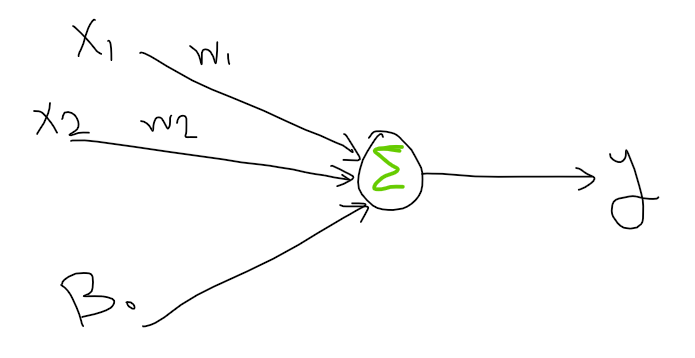

#### Before we start train our model, we have to initialize W(parameters)

In [7]:
#Initialize Model Parameters
beta  = tf.Variable(tf.random.normal(shape = (3, 1), mean = 0, stddev = 0.01),
                    trainable = True)
beta0 = tf.Variable(tf.zeros(1), trainable = True)

In [8]:
# Define the Model
def linear_reg(X, beta, beta0):  
    #Create the linear regression model
    return tf.matmul(X, beta) + beta0

In [9]:
# Define Loss function

def loss_func(y_hat, y):
    #Squared Loss Function
    return 1 / 2 * (y_hat - tf.reshape(y, y_hat.shape)) ** 2



In [10]:
# Define the Optimization Algorithm
def sgd(params, grads, learning_rate, batch_size):
    #Batch Stochastic Gradient Descent
    for param, grad in zip(params, grads):
        param.assign_sub(learning_rate * grad / batch_size)

# Train Our Model

In [11]:
learning_rate = 0.03
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in read_batch(batch_size, features, response):
        with tf.GradientTape() as g:
            #Calculate Batch Loss in `X` and `y`
            loss = loss_func(linear_reg(X, beta, beta0), y) 
            #Compute Gradient on Loss with respect to [`beta`, `beta0`]
            dloss_beta, dloss_beta0 = g.gradient(loss, [beta, beta0])
        #Update parameters using their gradient
        sgd([beta, beta0], [dloss_beta, dloss_beta0], learning_rate, batch_size)
    train_l = loss_func(linear_reg(features, beta, beta0), response)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)): 0.4f}')

epoch 1, loss  0.0601
epoch 2, loss  0.0052
epoch 3, loss  0.0050
epoch 4, loss  0.0050
epoch 5, loss  0.0050
epoch 6, loss  0.0050
epoch 7, loss  0.0050
epoch 8, loss  0.0050
epoch 9, loss  0.0050
epoch 10, loss  0.0050


In [12]:
print(f'Estimating beta: {beta.numpy()}')
print(f'Estimating beta0: {beta0.numpy()}') 

Estimating beta: [[ 1.5067477 ]
 [-2.3069017 ]
 [ 0.80314976]]
Estimating beta0: [6.102561]


In [13]:
# Real Beta
beta


<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.5067477 ],
       [-2.3069017 ],
       [ 0.80314976]], dtype=float32)>

In [14]:
# Real Beta0
beta0

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([6.102561], dtype=float32)>

In [15]:
# Reference:
# Deep dive to deep learning